#**Machine Learning Models: Performance Comparison**

##The dataset

**Dataset file name:** chronic_kidney_disease.csv

**Attribute Information:** 

There are 24 features + class = 25 attributes
1.  Age(numerical): age in years
2.Blood Pressure(numerical): bp in mm/Hg
3.Specific Gravity(nominal): sg - (1.005,1.010,1.015,1.020,1.025)
4.Albumin(nominal): al - (0,1,2,3,4,5)
5.Sugar(nominal): su - (0,1,2,3,4,5)
6.Red Blood Cells(nominal): rbc - (normal,abnormal)
7.Pus Cell (nominal): pc - (normal,abnormal)
8.Pus Cell clumps(nominal): pcc - (present,notpresent)
9.Bacteria(nominal): ba - (present,notpresent)
10.Blood Glucose Random(numerical): bgr in mgs/dl
11.Blood Urea(numerical): bu in mgs/dl
12.Serum Creatinine(numerical): sc in mgs/dl
13.Sodium(numerical): sod in mEq/L
14.Potassium(numerical): pot in mEq/L
15.Hemoglobin(numerical): hemo in gms
16.Packed Cell Volume(numerical)
17.White Blood Cell Count(numerical): wc in cells/cumm
18.Red Blood Cell Count(numerical): rc in millions/cmm
19.Hypertension(nominal): htn - (yes,no)
20.Diabetes Mellitus(nominal): dm - (yes,no)
21.Coronary Artery Disease(nominal): cad - (yes,no)
22.Appetite(nominal): appet - (good,poor)
23.Pedal Edema(nominal): pe - (yes,no)
24.Anemia(nominal): ane - (yes,no)
25.Class (nominal): class - (ckd, notckd)


## Part 1

Using the following four supervised machine learning methods, answer questions(A-D).
1.   Support vector machine
2.   K-Nearest Neighbour
3.   Decision tree, and
4.   Random forest

**A.**  Build optimised classification model to predict the chronic kidney disease from the dataset.

**B.** For each optimised model, answer the followings

*  which hyperparameters were optimised? [Hint: For SVM, kernel can be considered as one of the hyperparameters.]

*  what set or range of values were used for each hyperparameter?

*  which metric was used to measure the performance?

*  justify your design decisions.

**C.**  Plot the prediction performance against hyperparameter values to visualise the optimisation process and mark the optimal value.

**D.** Evaluate the model (obtained from A) performance on the test set. Report the confusion matrix, F1-score and accuracy.

In [ ]:
### WARNING: It takes about 2 to 5 minutes to run all the models, specially Random Forest ###
#Build data features for modeling
#Retrieve the dataset
import pandas as pd
import numpy as np
myData = pd.read_csv('chronic_kidney_disease.csv')

#Create dummy variable for the target variable
myData['class_dummy'] = myData['class'].map({'ckd':1, 'notckd':0})
myData.drop(['class'],axis=1,inplace=True)

#The following steps are for cleaning up the dataset prior to modeling
#=====================================================================
#get all variable to number and fill the '?' with NaN
myData = myData.apply(pd.to_numeric,errors = 'coerce') 

#get the average values of all columns and round them
column_means = np.round(myData.mean())

#Update specific (average) values for nominal variables 
#(Binary variables have no missing values, so none of them will be impacted)
column_means['sg'] = 1.015
column_means['al'] = 2
column_means['su'] = 2

#Fill the average values to the NaN cells
#The average values will minimize the impact of model calculation
myData = myData.fillna(value=column_means)

#Get the features variables
features = myData.drop(['class_dummy'], axis = 1)
#I have checked the correlation between all feature variables using myData.corr()
#from the huge corr table, we found [rbcc] is highly correlated with [pcv] and [wbcc]
#So I decide to remove it from the feature variables
features.drop(['rbcc'], axis = 1, inplace = True)

#Get the target column
target = myData['class_dummy']

#Now select only 10 important features for modeling using ANOVA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
selection = SelectKBest(f_classif, k=10)
selection.fit_transform(features, target)
cols = selection.get_support()
features = features.iloc[:,cols] 
#Now [features] has 10 important variables, and [target] is the class
#========================================================================


For SVM model, hyper-parameters are includes Kernel, C, Degree and Gamma. These are the parameters that highly affect the performance of the model. I pick 3 common Kernels: LINEAR, POLY and RBF. Since defaut value of C is 1.0, here C values are selected from 0.001, 0.01,..to 10. Degree ranges from 2 to 10, while the default is 3. Gamma has its defaut value of 1/n*(x.feature) = 0.00025 in our case. So I range it from 0.0001, 0.0005,...,0.01. I limit this measurement to only accuracy because there are many parameters to tackle. It is good to know that the below accuracy measurements of SVM are done only with training performance. So they might performance differently during testing dataset.


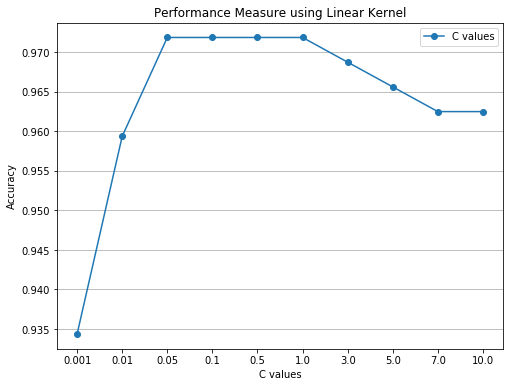

(Linear Kernel) The optimal accuracy is: 0.971875, at C = 0.05
NOTE: Linear does not support hyper parameter: DEGREE or GAMMA!!!


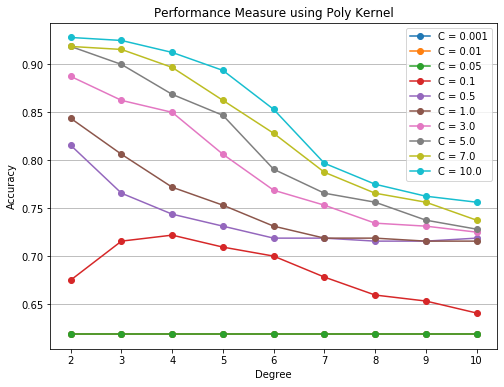

(Poly Kernel)The optimal accuracy is: 0.928125, at C = 10.0, DEGREE= 2
NOTE: the algorithm selects the best training accuracy with minimum value of C!!!


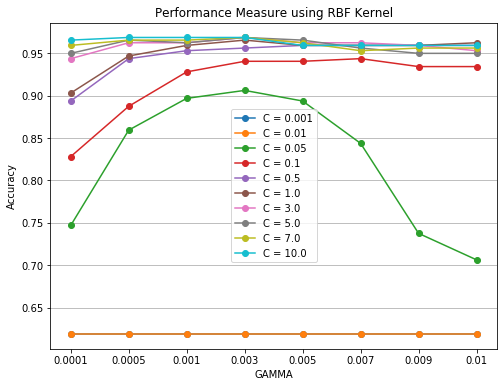

(RBF Kernel)The optimal accuracy is: 0.96875, at C = 3.0, GAMMA= 0.003
NOTE: the algorithm selects the best training accuracy with minimum value of C!!!


***So the best settings of SVM model are:***
Kernel: Linear with 'C' value of 0.05
Belows are the evaluation with test data using the above best settings:
The confusion matric: 
[[28  0]
 [ 4 48]]
The F1_score: 0.9600000000000001
The accuracy score: 0.95


In [ ]:
#Build the model using SVM (Tuning and Plotting)
print("For SVM model, hyper-parameters are includes Kernel, C, Degree and Gamma."\
      " These are the parameters that highly affect the performance of the model. I pick"\
      " 3 common Kernels: LINEAR, POLY and RBF. Since defaut value of C is 1.0, here"\
      " C values are selected from 0.001, 0.01,..to 10. Degree ranges from 2 to 10,"\
      " while the default is 3. Gamma has its defaut value of 1/n*(x.feature) = 0.00025"\
      " in our case. So I range it from 0.0001, 0.0005,...,0.01. I limit this measurement"\
      " to only accuracy because there are many parameters to tackle. It is good to know that the"\
      " below accuracy measurements of SVM are done only with training performance."\
      " So they might performance differently during testing dataset.")

from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

#Split the data into 80% Training and 20% Testing sets
xTrain, xTest, yTrain, yTest = train_test_split(features, target, test_size=0.2,random_state = 10)

#Hyper parameters setting
C = [0.001,0.01, 0.05, 0.1, 0.5, 1.0, 3.0, 5.0, 7.0, 10.0 ]
GAMMA = [0.0001,0.0005,0.001,0.003,0.005,0.007,0.009,0.01]
DEGREE = [2, 3, 4, 5, 6, 7, 8, 9 ,10]
linear_acc = []
poly_acc = []
rbf_acc = []

#Plot the performance of SVM with Linear Kernel (using 10 cross validation)
#=============================================
fig = plt.figure(figsize = (8, 6))
max_acc = [0,0]
for i in C:
    svm_model = svm.SVC(kernel='linear',C = i)
    acc_score = np.mean(cross_val_score(svm_model, xTrain, yTrain, cv=10, scoring='accuracy'))
    linear_acc.append([i, acc_score])
    #Record the best accuracy
    if max_acc[1] < acc_score:
            max_acc[0] = i
            max_acc[1] = acc_score
#Plot the graph
linear_acc = np.array(linear_acc)
plt.plot(range(1,11,1),linear_acc[:,1],marker='o', label='C values')
plt.xticks(range(1,11,1), C)
plt.grid(b=True, which='major', axis='y')
plt.title("Performance Measure using Linear Kernel")
plt.xlabel("C values")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
print("(Linear Kernel) The optimal accuracy is: {}, at C = {}"
      .format(max_acc[1],max_acc[0]))
print("NOTE: Linear does not support hyper parameter: DEGREE or GAMMA!!!")

#Plot the performance of SVM with Poly Kernel
#=============================================
fig = plt.figure(figsize = (8, 6))
max_acc = [0,0,0]
for i in C:
    for j in DEGREE:
        svm_model = svm.SVC(kernel='poly',C = i, degree = j)
        acc_score = np.mean(cross_val_score(svm_model, xTrain, yTrain, cv=10, scoring='accuracy'))
        poly_acc.append([i, j, acc_score])
        #Record the best accuracy
        if max_acc[2] < acc_score:
            max_acc[0] = i
            max_acc[1] = j
            max_acc[2] = acc_score
    #create sub_plots
    poly_acc = np.array(poly_acc)
    plt.plot(poly_acc[:,1],poly_acc[:,2],marker='o', label=('C = '+format(poly_acc[0,0])))
    poly_acc = []
#Plot each graph
plt.grid(b=True, which='major', axis='y')
plt.title("Performance Measure using Poly Kernel")
plt.xlabel("Degree")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
print("(Poly Kernel)The optimal accuracy is: {}, at C = {}, DEGREE= {}"
      .format(max_acc[2],max_acc[0],max_acc[1]))
print("NOTE: the algorithm selects the best training accuracy with minimum value of C!!!")

#Plot the performance of SVM with RBF Kernel
#============================================= 
fig = plt.figure(figsize = (8, 6))
max_acc = [0,0,0]
for i in C:
    for j in GAMMA:
        svm_model = svm.SVC(kernel='rbf',C = i, gamma = j)
        acc_score = np.mean(cross_val_score(svm_model, xTrain, yTrain, cv=10, scoring='accuracy'))
        rbf_acc.append([i, j, acc_score])
        #Record the best accuracy
        if max_acc[2] < acc_score:
            max_acc[0] = i
            max_acc[1] = j
            max_acc[2] = acc_score
    #create sub_plots
    rbf_acc = np.array(rbf_acc)
    plt.plot(range(1,9,1),rbf_acc[:,2],marker='o', label=('C = '+format(rbf_acc[0,0])))
    rbf_acc = []
#Plot each graph
plt.grid(b=True, which='major', axis='y')
plt.xticks(range(1,9,1), GAMMA)
plt.title("Performance Measure using RBF Kernel")
plt.xlabel("GAMMA")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
print("(RBF Kernel)The optimal accuracy is: {}, at C = {}, GAMMA= {}"
      .format(max_acc[2],max_acc[0],max_acc[1]))
print("NOTE: the algorithm selects the best training accuracy with minimum value of C!!!\n\n")

#Indicate the best settings of the model
print("="*50)
print("***So the best settings of SVM model are:***")
print("Kernel: Linear with 'C' value of 0.05")
#=================================================================
#Evaluation with test data using the best settings
#=================================================================
print("="*50)
svm_model = svm.SVC(kernel='linear',C = 0.05)
svm_model.fit(xTrain,yTrain)
yPred = svm_model.predict(xTest)
acc_score = metrics.accuracy_score(yTest, yPred)
f1_score = metrics.f1_score(yTest,yPred)
conf_mat = metrics.confusion_matrix(yTest, yPred)
print("Belows are the evaluation with test data using the above best settings:")
print("The confusion matric: \n{}".format(conf_mat))
print("The F1_score: {}".format(f1_score))
print("The accuracy score: {}".format(acc_score))


This is k-Nearest Neighbour (KNN) model. The hyper parameters of the model include: number of neighbours (K), weight function used in prediction (WEIGHTS), and distance metric (P). By default, K = 5. So I use a range of values from 2, 3, to 10. For WEIGHTS, there are only two options. 1 is 'uniform' option which sets all data points with same weight, while 2 is 'distance' that gives more weight to a closer neighbour. Distance metric also have only two options: either 'Manhattan' or ,by default, 'Euclidean'. Same as earlier models, accuracy score is the only measurement which is conducted on the training data.


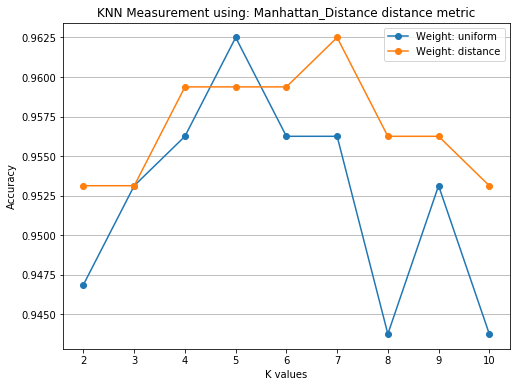

The optimal accuracy is: 0.9625, at Weight = uniform, K = 5




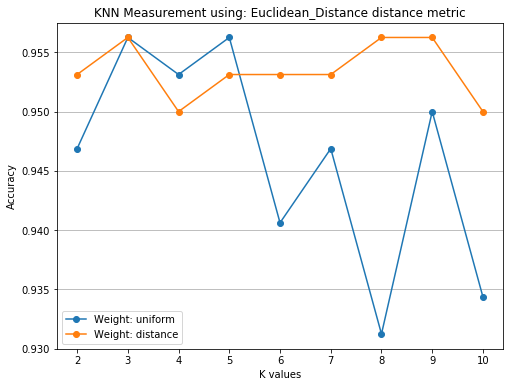

The optimal accuracy is: 0.95625, at Weight = uniform, K = 3


***So the best settings of KNN model are:***
Accuracy = 0.9625, at Distance Metric = Manhattan_Distance, Weight = uniform, K = 5
Belows are the evaluation with test data using the above best settings:
The confusion matric: 
[[27  1]
 [ 6 46]]
The F1_score: 0.9292929292929293
The accuracy score: 0.9125


In [ ]:
#Build the model using KNN (Tuning and Plotting)
print("This is k-Nearest Neighbour (KNN) model. The hyper parameters of the model include: number of neighbours (K),"\
      " weight function used in prediction (WEIGHTS), and distance metric (P). By default, K = 5."\
      " So I use a range of values from 2, 3, to 10. For WEIGHTS, there are only two options. 1 is 'uniform' option"\
      " which sets all data points with same weight, while 2 is 'distance' that gives more weight to a closer neighbour."\
      " Distance metric also have only two options: either 'Manhattan' or ,by default, 'Euclidean'."\
      " Same as earlier models, accuracy score is the only measurement which is conducted on the training data.")

from sklearn.neighbors import KNeighborsClassifier

#Hyper parameters setting
K = [2,3,4,5,6,7,8,9,10] #default: 5
#ALGORITHM = {1:'ball_tree', 2:'kd_tree', 3:'brute'} I tried ALGORITHM, but all have same results
WEIGHTS = {1:'uniform',2:'distance'} #default: uniform
P = {1:'Manhattan_Distance',2:'Euclidean_Distance'}# default: 2
knn_acc = []
best_acc = [0,0,0,0]

#Train the model
for a in P:
    max_acc = [0,0,0,0]
    fig = plt.figure(figsize = (8, 6))
    for b in WEIGHTS:
        for c in K:
            knn_model = KNeighborsClassifier(p = a, weights = WEIGHTS[b], n_neighbors = c)
            knn_model.fit(xTrain,yTrain)
            acc_score = np.mean(cross_val_score(knn_model, xTrain, yTrain, cv=10, scoring='accuracy'))
            knn_acc.append([a, b, c, acc_score])
            if max_acc[3] < acc_score:
                max_acc[0] = a
                max_acc[1] = b
                max_acc[2] = c
                max_acc[3] = acc_score
                if best_acc[3] < max_acc[3]:
                    best_acc = max_acc
        #create sub_plots
        knn_acc = np.array(knn_acc)
        plt.plot(knn_acc[:,2],knn_acc[:,3],marker='o', label=('Weight: '+format(WEIGHTS[b])))
        knn_acc = []
    #Plot each graph
    plt.grid(b=True, which='major', axis='y')
    plt.title("KNN Measurement using: {} distance metric".format(P[a]))
    plt.xlabel("K values")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()
    print("The optimal accuracy is: {}, at Weight = {}, K = {}\n\n"
      .format(max_acc[3],WEIGHTS[max_acc[1]],max_acc[2]))
    
#Indicate the best settings of the model
print("="*50)
print("***So the best settings of KNN model are:***")
print("Accuracy = {}, at Distance Metric = {}, Weight = {}, K = {}"
      .format(best_acc[3],P[best_acc[0]], WEIGHTS[best_acc[1]], best_acc[2]))
#=================================================================
#Evaluation with test data using the best settings
#=================================================================
print("="*50)
knn_model = KNeighborsClassifier(p = best_acc[0], weights = WEIGHTS[best_acc[1]],
                                 n_neighbors = best_acc[2])
knn_model.fit(xTrain,yTrain)
yPred = knn_model.predict(xTest)
acc_score = metrics.accuracy_score(yTest, yPred)
f1_score = metrics.f1_score(yTest,yPred)
conf_mat = metrics.confusion_matrix(yTest, yPred)
print("Belows are the evaluation with test data using the above best settings:")
print("The confusion matric: \n{}".format(conf_mat))
print("The F1_score: {}".format(f1_score))
print("The accuracy score: {}".format(acc_score))


This is the performance measurement of Decision Tree(DT) model. In DT, there is not much hyper parameters that we can test. So in this experiment, only max_depth parameter is simulated for the accuracy of the training data. By default, the depth of the tree will extend until the leaves are less than 2.  Therefore, I range the depth experiment from 1 to 15.


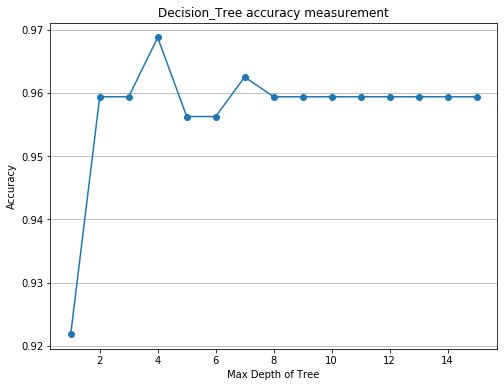

The optimal accuracy is: 0.96875, at Max Depth = 4.0


Belows are the evaluation with test data using best settings (max_depth = 4):
The confusion matric: 
[[25  3]
 [ 0 52]]
The F1_score: 0.9719626168224299
The accuracy score: 0.9625


In [ ]:
#Building the model using Decision Tree (Tuning and Plotting)

print("This is the performance measurement of Decision Tree(DT) model. In DT,"\
      " there is not much hyper parameters that we can test. So in this experiment,"\
      " only max_depth parameter is simulated for the accuracy of the training data."\
      " By default, the depth of the tree will extend until the leaves are less than 2. "\
      " Therefore, I range the depth experiment from 1 to 15.")

from sklearn.tree import DecisionTreeClassifier

#Hyper parameters setting
DEPTH = range(1,16,1) # default till leaves < 2
dt_acc = []
max_acc = np.zeros([2])
fig = plt.figure(figsize = (8, 6))

#Train the model
for i in DEPTH:
    dt_model = DecisionTreeClassifier(max_depth=i, random_state=10)
    acc_score = np.mean(cross_val_score(dt_model, xTrain, yTrain, cv=10, scoring='accuracy'))
    dt_acc.append([i, acc_score])
    if max_acc[1] < acc_score:
        max_acc[0] = i
        max_acc[1] = acc_score
dt_acc = np.array(dt_acc)
#Ploting        
plt.plot(dt_acc[:,0],dt_acc[:,1],marker='o')
plt.grid(b=True, which='major', axis='y')
plt.title("Decision_Tree accuracy measurement")
plt.xlabel("Max Depth of Tree")
plt.ylabel("Accuracy")
plt.show()
print("The optimal accuracy is: {}, at Max Depth = {}\n\n"
      .format(max_acc[1],max_acc[0]))

#=================================================================
#Evaluation with test data using the best settings
#=================================================================
print("="*50)
dt_model = DecisionTreeClassifier(max_depth= max_acc[0], random_state=10)
dt_model.fit(xTrain,yTrain)
yPred = dt_model.predict(xTest)
acc_score = metrics.accuracy_score(yTest, yPred)
f1_score = metrics.f1_score(yTest,yPred)
conf_mat = metrics.confusion_matrix(yTest, yPred)
print("Belows are the evaluation with test data using best settings (max_depth = 4):")
print("The confusion matric: \n{}".format(conf_mat))
print("The F1_score: {}".format(f1_score))
print("The accuracy score: {}".format(acc_score))


This is the performance measurement of Random Forest(RF) model. Similarly to the DT, there is not much of parameters can be tunned. The main hyper parameters here are the depth of tree (max_depth) and number of trees in the forest (n_estimator). By default, the depth of the tree will extend until the leaves are less than 2.  So, I range the depth experiment from 1 to 10. N_estimator systematically is set to 100, So it is tested in a range of 50 to 1000.


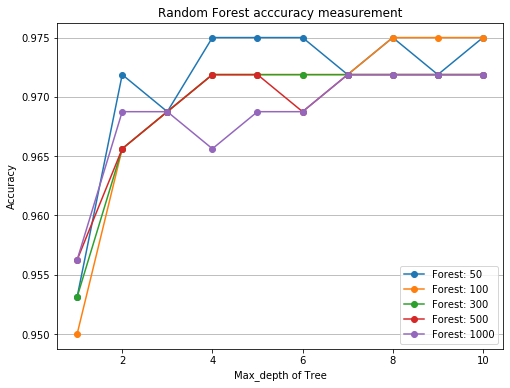

The optimal accuracy is: 0.975, at max_depth = 4, number of forest = 50
NOTE: the algorithm selects the best training accuracy with minimum values of max_depth.


Belows are the evaluation with test data using the above best settings:
The confusion matric: 
[[27  1]
 [ 0 52]]
The F1_score: 0.9904761904761905
The accuracy score: 0.9875


In [ ]:
#WARNING: This Random Forest model takes a few minutes to complete!!!
print("This is the performance measurement of Random Forest(RF) model. Similarly to the DT,"\
      " there is not much of parameters can be tunned. The main hyper parameters here are the"\
      " depth of tree (max_depth) and number of trees in the forest (n_estimator)."\
      " By default, the depth of the tree will extend until the leaves are less than 2. "\
      " So, I range the depth experiment from 1 to 10. N_estimator systematically is set"\
      " to 100, So it is tested in a range of 50 to 1000.")
#Building the model using Random Forest (RF)
from sklearn.ensemble import RandomForestClassifier

#Hyper parameters setting
DEPTH = range(1,11,1) # default till leaves < 2
ESTIMATOR = [50, 100, 300, 500, 1000] # default: 100
rf_acc = []
fig = plt.figure(figsize = (8, 6))
max_acc = [0,0,0]

#Train the model
for a in ESTIMATOR:
    for b in DEPTH:
        rf_model = RandomForestClassifier(n_estimators = a, max_depth = b, random_state = 10)
        acc_score = np.mean(cross_val_score(rf_model, xTrain, yTrain, cv=10, scoring='accuracy'))
        rf_acc.append([a, b, acc_score])
        if max_acc[2] < acc_score:
            max_acc[0] = a
            max_acc[1] = b
            max_acc[2] = acc_score
    #create sub_plots
    rf_acc = np.array(rf_acc)
    plt.plot(rf_acc[:,1],rf_acc[:,2],marker='o', label=('Forest: '+format(a)))
    rf_acc = []
#Plot the main graph
plt.grid(b=True, which='major', axis='y')
plt.title("Random Forest acccuracy measurement")
plt.xlabel("Max_depth of Tree")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
print("The optimal accuracy is: {}, at max_depth = {}, number of forest = {}"
      .format(max_acc[2],max_acc[1],max_acc[0]))
print("NOTE: the algorithm selects the best training accuracy with minimum values of max_depth.\n\n")

#Evaluation with test data using  the best settings
#=================================================================
print("="*50)
rf_model = RandomForestClassifier(n_estimators = max_acc[0], max_depth = max_acc[1], random_state = 10)
rf_model.fit(xTrain,yTrain)
yPred = rf_model.predict(xTest)
acc_score = metrics.accuracy_score(yTest, yPred)
f1_score = metrics.f1_score(yTest,yPred)
conf_mat = metrics.confusion_matrix(yTest, yPred)
print("Belows are the evaluation with test data using the above best settings:")
print("The confusion matric: \n{}".format(conf_mat))
print("The F1_score: {}".format(f1_score))
print("The accuracy score: {}".format(acc_score))
                    

## Part 2: Discussion

Based on the results obtained in Part-1, which classification method showed the best performance and why? Do you have any suggestions to further improve the model performances?


Based on the results of different models, I can finally conclude that Random Forest works the best (up to 99% accurate) for this dataset. To my understanding, SVM becomes less efficient when working with few data points, specifically in our case. KNN, on the other hand, is under performed with high dimensional dataset specially categorical features because it depends mainly on distance metric. DT and RF are very similar, except that DT becomes more bias when there are more features because it learns from every feature to make prediction. RF, is this case, can moderate the issue by generalzing the assumption from various trees in the forest. Based on these reasons, I believe RF captures the best prediction in our scenario.

There are plenty of rooms that my models can be further improved, if without time constraint. More hyper parameters are not yet explore since I only pick the important ones. There are more ways to select the data features which may be more effecient to pick the right variables for modeling. Lastly, some data values were missing and my cleaning process may somehow affect the true nature of the data. If large dataset is at hand, the missing values can be trimmed off to optimize the right settings for the model.